Status - credit status

Seniority - job seniority (years)

Home - type of home ownership

Time - time of requested loan

Age - client's age

Marital - marital status

Records - existence of records

Job - type of job

Expenses - amount of expenses

Income - amount of income

Assets - amount of assets

Debt - amount of debt

Amount - amount requested of loan

Price - price of good

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Data cleaning and preparation

In [2]:
df = pd.read_csv('CreditScoring.csv')
df

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


In [3]:
df.columns = df.columns.str.lower()
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


In [4]:
df.status

0       1
1       1
2       2
3       1
4       1
       ..
4450    2
4451    1
4452    2
4453    1
4454    1
Name: status, Length: 4455, dtype: int64

In [5]:
df.columns

Index(['status', 'seniority', 'home', 'time', 'age', 'marital', 'records',
       'job', 'expenses', 'income', 'assets', 'debt', 'amount', 'price'],
      dtype='object')

In [6]:
for col in ['status', 'home', 'marital', 'records', 'job']:
    print(df[col].value_counts())


status
1    3200
2    1254
0       1
Name: count, dtype: int64
home
2    2107
1     973
5     783
6     319
3     247
4      20
0       6
Name: count, dtype: int64
marital
2    3241
1     978
4     130
3      67
5      38
0       1
Name: count, dtype: int64
records
1    3682
2     773
Name: count, dtype: int64
job
1    2806
3    1024
2     452
4     171
0       2
Name: count, dtype: int64


In [7]:
status_values = {
    1: 'ok', 
    2:'default', 
    0:'unknown'
    }
df.status = df.status.map(status_values)

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unknown'
}
df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unknown'
}
df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unknown'
}
df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unknown'
}
df.job = df.job.map(job_values)

In [8]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


Missing values

In [9]:
df.describe().round() #999999.0 is actualy missing values

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [10]:
df.income.replace(to_replace= 99999999, value = np.nan)

0       129.0
1       131.0
2       200.0
3       182.0
4       107.0
        ...  
4450     92.0
4451     75.0
4452     90.0
4453    140.0
4454    140.0
Name: income, Length: 4455, dtype: float64

In [11]:
df.income.replace(to_replace= 99999999, value = np.nan).max()

959.0

In [12]:
for col in ['income', 'assets', 'debt']:
    df[col] = df[col].replace(to_replace= 99999999, value = np.nan)

In [13]:
df.describe().round() 

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [14]:
#status 0 (unknown) is also missing value
df.status.value_counts()


status
ok         3200
default    1254
unknown       1
Name: count, dtype: int64

In [15]:
df[ df.status != 'unknown'].reset_index( drop = True)  #removed unknown status

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,default,1,rent,60,39,married,no,fixed,69,92.0,0.0,0.0,900,1020
4450,ok,22,owner,60,46,married,no,fixed,60,75.0,3000.0,600.0,950,1263
4451,default,0,owner,24,37,married,no,partime,60,90.0,3500.0,0.0,500,963
4452,ok,0,rent,48,23,single,no,freelance,49,140.0,0.0,0.0,550,550


Split the data into train, validation and test set

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
df_full_train, df_test = train_test_split(df, test_size= 0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [18]:
df_train.reset_index(drop=True)
df_val.reset_index(drop=True)
df_test.reset_index(drop=True)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,2,owner,36,37,married,no,fixed,60,125.0,2000.0,0.0,450,1490
1,default,2,owner,30,32,married,no,fixed,90,74.0,1500.0,0.0,500,650
2,ok,2,rent,60,28,single,no,fixed,47,115.0,0.0,0.0,1000,1015
3,ok,8,other,30,40,married,no,fixed,45,148.0,0.0,0.0,850,1370
4,default,12,owner,60,47,married,yes,freelance,75,285.0,20000.0,0.0,1440,1440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,ok,10,owner,6,52,married,no,freelance,35,142.0,24000.0,0.0,300,1064
887,default,26,private,60,41,separated,yes,fixed,35,201.0,4700.0,3100.0,2400,2700
888,ok,7,owner,60,47,married,no,freelance,45,0.0,9000.0,0.0,1500,1661
889,ok,22,rent,48,46,married,no,fixed,86,110.0,0.0,0.0,1150,1528


In [19]:
y_train = (df_train.status == 'default').astype('int').values
y_val = (df_val.status == 'default').astype('int').values
y_test = (df_test.status == 'default').astype('int').values

In [20]:
del df_train['status']
del df_val['status']
del df_test['status']

Decision Trees

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer #for categorical variables

In [22]:
train_dicts = df_train.fillna(0).to_dict(orient='records')  #orient='records' daje svaki red zapisan u obliku rečnika i sada imamo listu rečnika
train_dicts

[{'seniority': 3,
  'home': 'rent',
  'time': 36,
  'age': 61,
  'marital': 'married',
  'records': 'no',
  'job': 'fixed',
  'expenses': 41,
  'income': 57.0,
  'assets': 12000.0,
  'debt': 0.0,
  'amount': 2500,
  'price': 3559},
 {'seniority': 5,
  'home': 'rent',
  'time': 48,
  'age': 30,
  'marital': 'separated',
  'records': 'yes',
  'job': 'partime',
  'expenses': 39,
  'income': 41.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1300,
  'price': 1600},
 {'seniority': 15,
  'home': 'owner',
  'time': 60,
  'age': 32,
  'marital': 'divorced',
  'records': 'no',
  'job': 'freelance',
  'expenses': 35,
  'income': 0.0,
  'assets': 6000.0,
  'debt': 3300.0,
  'amount': 1550,
  'price': 1612},
 {'seniority': 2,
  'home': 'rent',
  'time': 12,
  'age': 47,
  'marital': 'married',
  'records': 'yes',
  'job': 'fixed',
  'expenses': 103,
  'income': 426.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 350,
  'price': 450},
 {'seniority': 6,
  'home': 'parents',
  'time': 48,
  'age': 32,


In [23]:
dv = DictVectorizer(sparse = False)
X_train = dv.fit_transform(train_dicts)

In [24]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unknown', 'income', 'job=fixed',
       'job=freelance', 'job=others', 'job=partime', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unknown', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [25]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Ww train our model and now we want to test it on validation set 

In [26]:
val_dicts = df_val.fillna(0).to_dict(orient= 'records')
X_val = dv.transform(val_dicts)  #we use only transform on validation set
X_val

array([[3.7e+01, 1.0e+03, 5.0e+03, ..., 0.0e+00, 3.0e+00, 3.6e+01],
       [2.4e+01, 1.2e+03, 3.5e+03, ..., 0.0e+00, 1.0e+00, 3.6e+01],
       [4.0e+01, 7.0e+02, 0.0e+00, ..., 1.0e+00, 1.7e+01, 2.4e+01],
       ...,
       [3.1e+01, 1.5e+03, 9.0e+03, ..., 1.0e+00, 1.0e+00, 6.0e+01],
       [2.5e+01, 8.5e+02, 5.0e+03, ..., 0.0e+00, 6.0e+00, 2.4e+01],
       [2.4e+01, 4.0e+02, 0.0e+00, ..., 0.0e+00, 1.0e+00, 2.4e+01]])

In [27]:
y_val_pred = dt.predict_proba(X_val)[:, 1] #uzimamo prvu kolonu

In [28]:
from sklearn.metrics import roc_auc_score

In [29]:
roc_auc_score(y_val, y_val_pred) #not impressive

0.6645045056181164

AUC ROC score for train data

In [30]:
y_train_pred = dt.predict_proba(X_train)[:, 1]
y_train_pred

array([1., 1., 0., ..., 0., 0., 0.])

In [31]:
roc_auc_score(y_train, y_train_pred) #on train data set we have auc roc score 1, but on validation set is only 0.67, so it is probably overfitting

1.0

Finding the best parameter for depth of dt

In [32]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [33]:
y_train_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_train_pred)
print('train: ', auc)

y_val_pred = dt.predict_proba(X_val)[:, 1] 
auc = roc_auc_score(y_val, y_val_pred) 
print('val: ', auc)  #with max_depth = 3 our model performes better, there is no overfitting

train:  0.7660925386129352
val:  0.763427236430611


Visualization Decision Trees 

In [34]:
from sklearn.tree import export_text

In [35]:
print(export_text(dt, feature_names = dv.get_feature_names_out()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- income <= 50.50
|   |   |   |--- class: 1
|   |   |--- income >  50.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 99.50
|   |   |   |--- class: 1
|   |   |--- income >  99.50
|   |   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 73.50
|   |   |   |--- class: 0
|   |   |--- income >  73.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- time <= 27.00
|   |   |   |--- class: 0
|   |   |--- time >  27.00
|   |   |   |--- class: 1



Decision Tree Learning Algorithm

In [36]:
#exampe
data = [
    [8000, 'default'],
    [2000, 'default'],
    [0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default']
]

df_example = pd.DataFrame(data, columns = ['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [37]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [38]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [39]:
from IPython.display import display  #da bismo pokazali df_left i df_right u loop funkciji
for T in Ts:
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]

    display(df_left)
    display(df_right)

    print()

0


,assets,status
2,0,default


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default



2000


,assets,status
1,2000,default
2,0,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default



3000


,assets,status
1,2000,default
2,0,default
7,3000,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok



4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok



5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


,assets,status
0,8000,default
6,9000,ok



8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


,assets,status
6,9000,ok


In [40]:
T = 4000
df_left = df_example[df_example.assets <= T]
df_right = df_example[df_example.assets > T]

display(df_left)
print(df_left['status'].value_counts(normalize = True))
display(df_right)
print(df_right['status'].value_counts(normalize = True))  #sa normlize=True dobijamo procenat tačnosti


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64


In [41]:
for T in Ts: #sve ovo gore radimo u loop, da vidimo koji treshold je najbolji
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]

    display(df_left)
    print(df_left['status'].value_counts(normalize = True))
    display(df_right)
    print(df_right['status'].value_counts(normalize = True))


0


,assets,status
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64
2000


,assets,status
1,2000,default
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64
3000


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64
4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64
5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,status
0,8000,default
6,9000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64
8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64


videli smo da je najbolji T  3000, šta kada imamo još kolona?

In [42]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000, 500, 'ok'],
    [3000, 2000, 'default']
]

df_example = pd.DataFrame(data, columns = ['assets', 'debt','status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [43]:
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [44]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}

In [45]:
for feature, Ts in thresholds.items():
    print('---------------------')
    print(feature)
    for T in Ts: #sve ovo gore radimo u loop, da vidimo koji treshold je najbolji
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print(df_left['status'].value_counts(normalize = True))
        display(df_right)
        print(df_right['status'].value_counts(normalize = True))
        print()


---------------------
assets
0


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

---------------------
debt
500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64



Decision Trees Parameter Tuning
    -selecting max_depth
    -selecting min_samples_leaf

In [46]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth = d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    print('%4s --- %.3f' % (d, auc))  #between 4 and 6 is the best   

   1 --- 0.613
   2 --- 0.688
   3 --- 0.763
   4 --- 0.779
   5 --- 0.784
   6 --- 0.773
  10 --- 0.704
  15 --- 0.664
  20 --- 0.672
None --- 0.668


In [47]:
for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth = d, min_samples_leaf = s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        print('(%4s, %3d) --- %.3f' % (d, s, auc)) 

(   4,   1) --- 0.779
(   4,   2) --- 0.779
(   4,   5) --- 0.779
(   4,  10) --- 0.774
(   4,  15) --- 0.771
(   4,  20) --- 0.784
(   4, 100) --- 0.767
(   4, 200) --- 0.765
(   4, 500) --- 0.671
(   5,   1) --- 0.783
(   5,   2) --- 0.782
(   5,   5) --- 0.786
(   5,  10) --- 0.783
(   5,  15) --- 0.780
(   5,  20) --- 0.785
(   5, 100) --- 0.786
(   5, 200) --- 0.778
(   5, 500) --- 0.671
(   6,   1) --- 0.775
(   6,   2) --- 0.778
(   6,   5) --- 0.786
(   6,  10) --- 0.791
(   6,  15) --- 0.795
(   6,  20) --- 0.802
(   6, 100) --- 0.793
(   6, 200) --- 0.789
(   6, 500) --- 0.671


In [48]:
scores = []

for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth = d, min_samples_leaf = s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, s, auc))

df_scores = pd.DataFrame(scores, columns = ['max_depth', 'min_samples_leaf', 'auc']) 
df_scores.sort_values(by = 'auc', ascending=False)

,max_depth,min_samples_leaf,auc
23,6,20,0.799043
22,6,15,0.794531
24,6,100,0.793276
21,6,10,0.790785
25,6,200,0.788792
20,6,5,0.786997
11,5,5,0.786916
15,5,100,0.786425
14,5,20,0.785229
9,5,1,0.783647


In [49]:
df_scores_pivot = df_scores.pivot( 
    index = 'min_samples_leaf',
    columns = ['max_depth'],
    values = ['auc']
)
df_scores_pivot.round(3)  #pivot table is just for visualization and now we can make heatmap of this

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.779  0.784  0.774
2                 0.779  0.782  0.775
5                 0.779  0.787  0.787
10                0.774  0.783  0.791
15                0.771  0.780  0.795
20                0.784  0.785  0.799
100               0.767  0.786  0.793
200               0.765  0.778  0.789
500               0.671  0.671  0.671

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

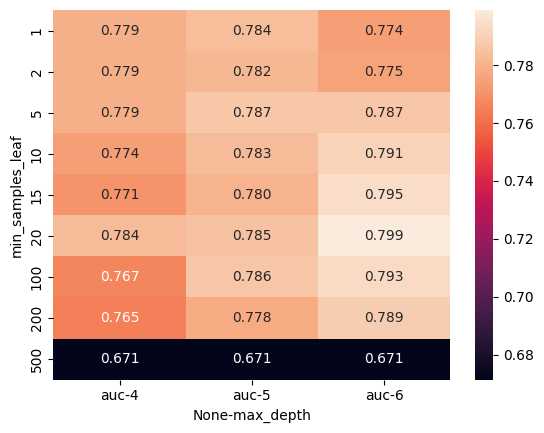

In [50]:
sns.heatmap(df_scores_pivot, annot= True, fmt = '.3f')

In [51]:
# this df is small so we can try more combinations with max_depth and min_samples_leaf

scores = []

for d in [4, 5, 6, 7, 10, 15, 20, None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth = d, min_samples_leaf = s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, s, auc))

df_scores = pd.DataFrame(scores, columns = ['max_depth', 'min_samples_leaf', 'auc']) 
df_scores.sort_values(by = 'auc', ascending=False)

,max_depth,min_samples_leaf,auc
50,15.0,20,0.802046
68,NaN,20,0.802000
59,20.0,20,0.801787
23,6.0,20,0.801787
41,10.0,20,0.801042
...,...,...,...
26,6.0,500,0.671368
17,5.0,500,0.671368
8,4.0,500,0.671368
71,NaN,500,0.671368


In [52]:
df_scores_pivot = df_scores.pivot( 
    index = 'min_samples_leaf',
    columns = ['max_depth'],
    values = ['auc']
)
df_scores_pivot.round(3) 

auc                                                 
max_depth           NaN   4.0    5.0    6.0    7.0    10.0   15.0   20.0
min_samples_leaf                                                        
1                 0.652  0.779  0.783  0.775  0.764  0.695  0.675  0.672
2                 0.699  0.779  0.783  0.778  0.763  0.713  0.693  0.685
5                 0.746  0.779  0.786  0.787  0.781  0.741  0.751  0.743
10                0.767  0.774  0.783  0.792  0.800  0.774  0.767  0.768
15                0.784  0.771  0.780  0.795  0.795  0.791  0.784  0.785
20                0.802  0.784  0.785  0.802  0.800  0.801  0.802  0.802
100               0.794  0.767  0.786  0.793  0.795  0.794  0.794  0.794
200               0.789  0.765  0.778  0.789  0.789  0.789  0.789  0.789
500               0.671  0.671  0.671  0.671  0.671  0.671  0.671  0.671

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

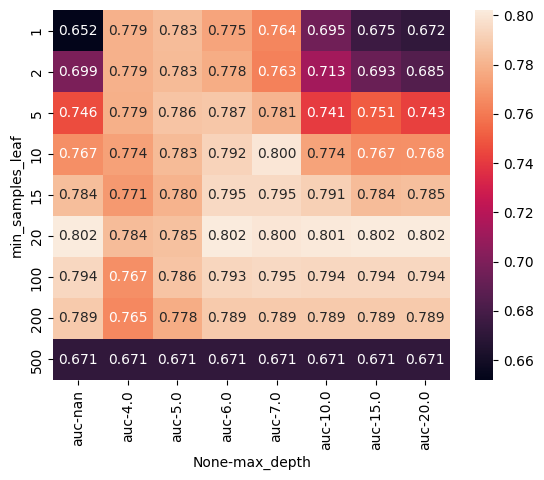

In [53]:
sns.heatmap(df_scores_pivot, annot= True, fmt = '.3f')

In [54]:
#finally training Decision Tree
dt = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 20)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)

Ensembles and random forest
-board of experts
-ensembling models
-random forest- ensembling decision trees
-tuning random forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [57]:
y_pred = rf.predict_proba(X_val)[:, 1]

In [58]:
roc_auc_score(y_val, y_pred)

0.8135545556805399

In [59]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=11)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

In [60]:
df_scores = pd.DataFrame(scores, columns = ['n_estimators', 'auc'])
df_scores

,n_estimators,auc
0,10,0.790121
1,20,0.823867
2,30,0.830223
3,40,0.833963
4,50,0.836033
5,60,0.834556
6,70,0.837056
7,80,0.835409
8,90,0.835285
9,100,0.835424


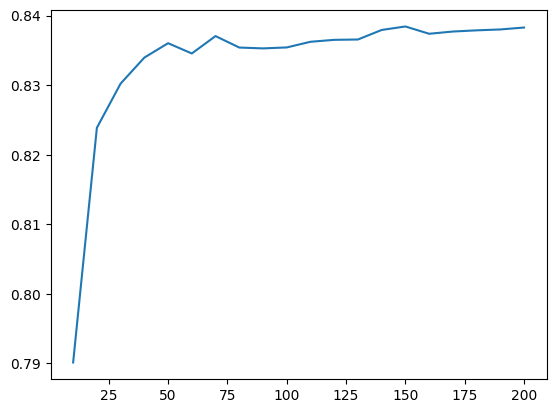

In [61]:
plt.plot(df_scores.n_estimators, df_scores.auc)

Tunning the RF model

In [62]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth = d, 
                                    random_state=11)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, auc))

columns = ['max_depth','n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns = columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.819374
1,5,20,0.827343
2,5,30,0.830060
3,5,40,0.828338
4,5,50,0.827390


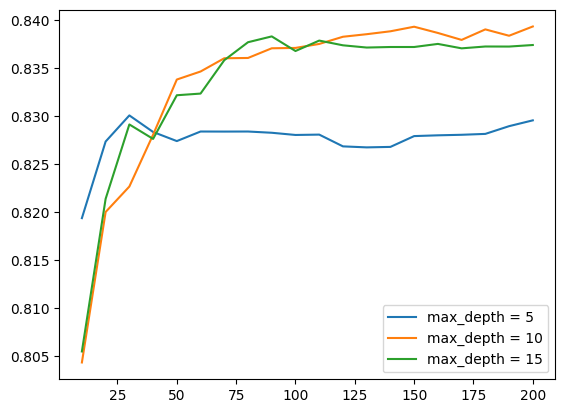

In [63]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label = 'max_depth = %d' %d)
plt.legend() #10 is the best one

In [64]:
max_depth = 10

In [65]:
scores = []

for s in [1, 3, 5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth = max_depth, 
                                    min_samples_leaf=s, 
                                    random_state=11)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, auc))

columns = ['min_samples_leaf','n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns = columns)
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.804358
1,1,20,0.820013
2,1,30,0.822662
3,1,40,0.828051
4,1,50,0.833793


In [66]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
min_samples_leaf_values = [1, 3, 5, 10, 50]
list(zip(min_samples_leaf_values, colors))

[(1, 'black'), (3, 'blue'), (5, 'orange'), (10, 'red'), (50, 'grey')]

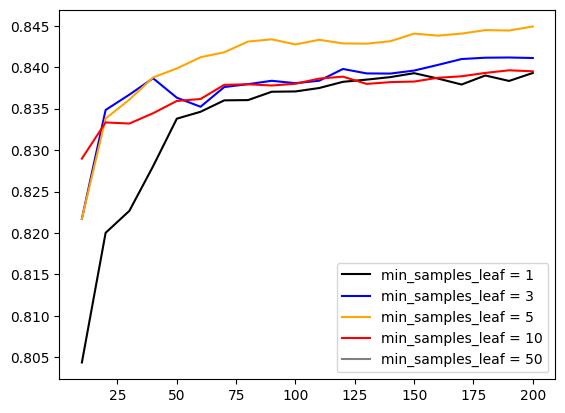

In [67]:
for s, col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators, 
             df_subset.auc, 
             color = col,
             label = 'min_samples_leaf = %s' %s)
plt.legend() #10 is the best one

In [68]:
min_sample_leaf = 5

In [69]:
rf = RandomForestClassifier(n_estimators=100, 
                            max_depth = max_depth, 
                            min_samples_leaf=min_sample_leaf, 
                            random_state=11)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, random_state=11)

Gradient Boosting and XGBoost

In [70]:
!pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
import xgboost as xgb

In [72]:
features = dv.get_feature_names_out().tolist()
features

['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unknown',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unknown',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

In [73]:
#we need our data in matrix form
dtrain = xgb.DMatrix(X_train, label = y_train, feature_names = features)
dval = xgb.DMatrix(X_val, label = y_val, feature_names = features)

In [74]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 4,

    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round = 10) #num_boost_round = 200 znači da će napraviti 200 stabala i svako novo pokušava da smanji gresku modela iz prethodnog koraka

In [75]:
y_pred = model.predict(dval)

In [76]:
roc_auc_score(y_val, y_pred)

0.8282333526990445

In [77]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [78]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,

    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, 
                  dtrain, 
                  num_boost_round = 200, 
                  verbose_eval = 5,
                  evals = watchlist) 

[0]	train-auc:0.85945	val-auc:0.79388
[5]	train-auc:0.92831	val-auc:0.82671
[10]	train-auc:0.94937	val-auc:0.82753
[15]	train-auc:0.96295	val-auc:0.82831
[20]	train-auc:0.97147	val-auc:0.82688
[25]	train-auc:0.97790	val-auc:0.82658
[30]	train-auc:0.98415	val-auc:0.82296
[35]	train-auc:0.98995	val-auc:0.81924
[40]	train-auc:0.99269	val-auc:0.81657
[45]	train-auc:0.99571	val-auc:0.81827
[50]	train-auc:0.99697	val-auc:0.81727
[55]	train-auc:0.99783	val-auc:0.81505
[60]	train-auc:0.99862	val-auc:0.81484
[65]	train-auc:0.99903	val-auc:0.81359
[70]	train-auc:0.99939	val-auc:0.81418
[75]	train-auc:0.99972	val-auc:0.81300
[80]	train-auc:0.99984	val-auc:0.81396
[85]	train-auc:0.99991	val-auc:0.81325
[90]	train-auc:0.99996	val-auc:0.81319
[95]	train-auc:0.99997	val-auc:0.81142
[100]	train-auc:0.99999	val-auc:0.81241
[105]	train-auc:1.00000	val-auc:0.81154
[110]	train-auc:1.00000	val-auc:0.81192
[115]	train-auc:1.00000	val-auc:0.81139
[120]	train-auc:1.00000	val-auc:0.81066
[125]	train-auc:1.0000

In [79]:
%%capture output 
#ovo se koristi da uhvati izlaz neke promenljive, neće se prikazati #izlaz, ali je taj izlaz sačuvan u promenljivoj output, pa posle #možemo da ga dohvatimo uz print(output.stdout)

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,

    'seed': 1,
    'verbosity': 1
}
#ovi parametri su po default-u, kasnije ćemo da ih podešavamo

model = xgb.train(xgb_params, 
                  dtrain, 
                  num_boost_round = 200, 
                  verbose_eval = 5,
                  evals = watchlist) 

In [80]:
print(output.stdout)

[0]	train-auc:0.85945	val-auc:0.79388
[5]	train-auc:0.92831	val-auc:0.82671
[10]	train-auc:0.94937	val-auc:0.82753
[15]	train-auc:0.96295	val-auc:0.82831
[20]	train-auc:0.97147	val-auc:0.82688
[25]	train-auc:0.97790	val-auc:0.82658
[30]	train-auc:0.98415	val-auc:0.82296
[35]	train-auc:0.98995	val-auc:0.81924
[40]	train-auc:0.99269	val-auc:0.81657
[45]	train-auc:0.99571	val-auc:0.81827
[50]	train-auc:0.99697	val-auc:0.81727
[55]	train-auc:0.99783	val-auc:0.81505
[60]	train-auc:0.99862	val-auc:0.81484
[65]	train-auc:0.99903	val-auc:0.81359
[70]	train-auc:0.99939	val-auc:0.81418
[75]	train-auc:0.99972	val-auc:0.81300
[80]	train-auc:0.99984	val-auc:0.81396
[85]	train-auc:0.99991	val-auc:0.81325
[90]	train-auc:0.99996	val-auc:0.81319
[95]	train-auc:0.99997	val-auc:0.81142
[100]	train-auc:0.99999	val-auc:0.81241
[105]	train-auc:1.00000	val-auc:0.81154
[110]	train-auc:1.00000	val-auc:0.81192
[115]	train-auc:1.00000	val-auc:0.81139
[120]	train-auc:1.00000	val-auc:0.81066
[125]	train-auc:1.0000

In [81]:
s = output.stdout
print(s)

[0]	train-auc:0.85945	val-auc:0.79388
[5]	train-auc:0.92831	val-auc:0.82671
[10]	train-auc:0.94937	val-auc:0.82753
[15]	train-auc:0.96295	val-auc:0.82831
[20]	train-auc:0.97147	val-auc:0.82688
[25]	train-auc:0.97790	val-auc:0.82658
[30]	train-auc:0.98415	val-auc:0.82296
[35]	train-auc:0.98995	val-auc:0.81924
[40]	train-auc:0.99269	val-auc:0.81657
[45]	train-auc:0.99571	val-auc:0.81827
[50]	train-auc:0.99697	val-auc:0.81727
[55]	train-auc:0.99783	val-auc:0.81505
[60]	train-auc:0.99862	val-auc:0.81484
[65]	train-auc:0.99903	val-auc:0.81359
[70]	train-auc:0.99939	val-auc:0.81418
[75]	train-auc:0.99972	val-auc:0.81300
[80]	train-auc:0.99984	val-auc:0.81396
[85]	train-auc:0.99991	val-auc:0.81325
[90]	train-auc:0.99996	val-auc:0.81319
[95]	train-auc:0.99997	val-auc:0.81142
[100]	train-auc:0.99999	val-auc:0.81241
[105]	train-auc:1.00000	val-auc:0.81154
[110]	train-auc:1.00000	val-auc:0.81192
[115]	train-auc:1.00000	val-auc:0.81139
[120]	train-auc:1.00000	val-auc:0.81066
[125]	train-auc:1.0000

In [82]:
line = s.split('\n')[0] #split-ujemo podatke po novom redu , \t je po razmaku
line

'[0]\ttrain-auc:0.85945\tval-auc:0.79388'

In [83]:
num_iter, train_auc, val_auc = line.split('\t') #split-ujemo po razmacima

In [84]:
num_iter

'[0]'

In [85]:
num_iter.strip('[]')

'0'

In [86]:
int(num_iter.strip('[]')) #ovako smo izvukli redni broj iteracije

0

In [87]:
train_auc


'train-auc:0.85945'

In [88]:
train_auc.split(':')[1]

'0.85945'

In [89]:
float(train_auc.split(':')[1])

0.85945

In [90]:
float(val_auc.split(':')[1])

0.79388

In [91]:
#sve ovo želimo da uradimo za svaku iteraciju i da predstavimo kao DF

def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))

    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns = columns)

    return df_results

In [92]:
df_score = parse_xgb_output(output)

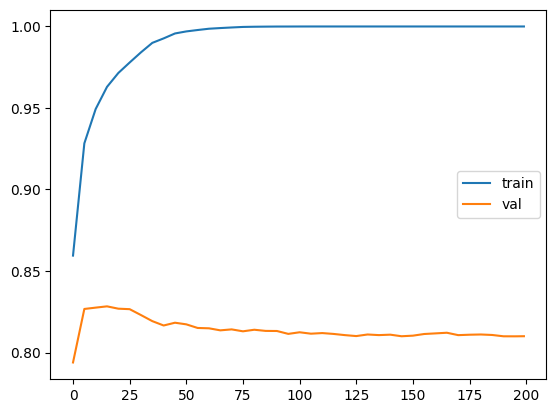

In [93]:
plt.plot(df_score.num_iter, df_score.train_auc, label = 'train')
plt.plot(df_score.num_iter, df_score.val_auc, label = 'val')
plt.legend()

overfittinng krece otprilike nakon 50.stabla odlučivanja, jer je train_auc približno 1, a val_auc počinje da opada

6.8 XGBoost parameter tuning

ETA parameter

In [94]:
scores = {} #da bi pamtilo key, mora da bude pozvano pre sve ove funkcije

In [95]:
%%capture output

xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,

    'seed': 1,
    'verbosity': 1
}
#ovi parametri su po default-u, kasnije ćemo da ih podešavamo

model = xgb.train(xgb_params, 
                  dtrain, 
                  num_boost_round = 200, 
                  verbose_eval = 5,
                  evals = watchlist) 

In [96]:
key = "eta=%s" % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.01'

In [97]:
scores['eta=0.01']

,num_iter,train_auc,val_auc
0,0,0.85945,0.79388
1,5,0.86743,0.79926
2,10,0.87062,0.80196
3,15,0.87804,0.81360
4,20,0.88250,0.81613
5,25,0.88756,0.81864
6,30,0.88995,0.82034
7,35,0.89095,0.81956
8,40,0.89138,0.81809
9,45,0.89180,0.81751


In [98]:
scores.keys()

dict_keys(['eta=0.01'])

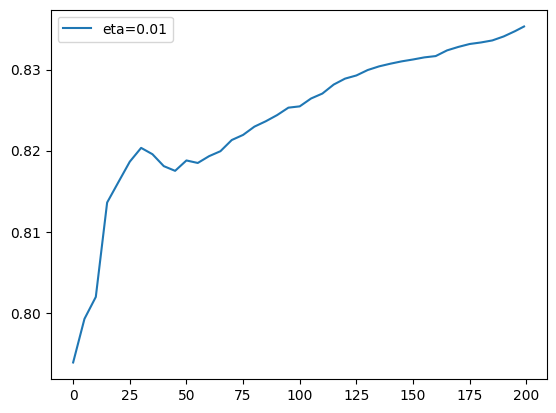

In [99]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label = key)
plt.legend()

In [100]:
#ovde treba uzeti eta = 0.05 ili eta= 0,1

MAX_DEPTH parameter

In [101]:
scores = {}

In [102]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 10,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,

    'seed': 1,
    'verbosity': 1
}
#ovi parametri su po default-u, kasnije ćemo da ih podešavamo

model = xgb.train(xgb_params, 
                  dtrain, 
                  num_boost_round = 200, 
                  verbose_eval = 5,
                  evals = watchlist) 

In [103]:
key = "max_depth=%s" % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

In [104]:
scores.keys()

dict_keys(['max_depth=10'])

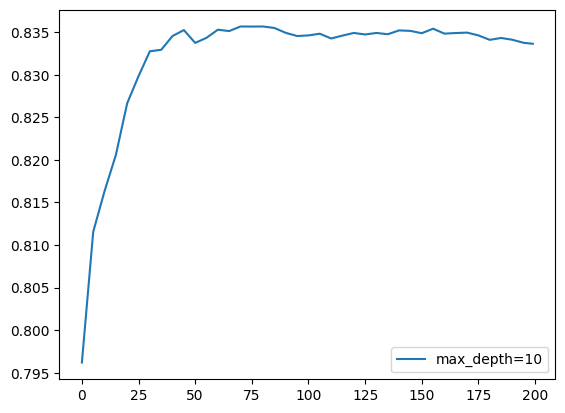

In [105]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label = max_depth)
    
plt.legend()

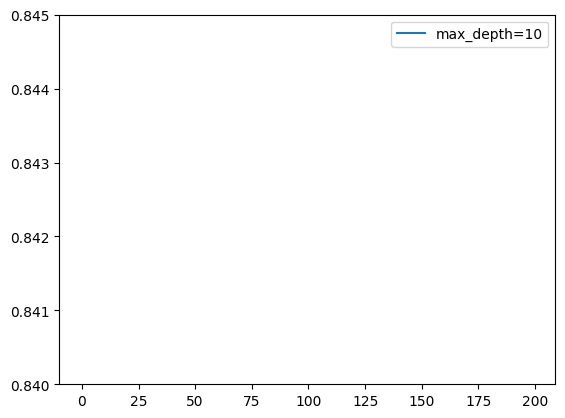

In [106]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label = max_depth)
    
plt.ylim(0.84, 0.845) #limit za y-osu
plt.legend()

In [107]:
#ovde bih uzela max_depth = 3, konstantno raste i slabo opada, maximum dostiže oko 150.iter, slično kao kod 4

MIN_CHILD_WEIGHT parameter

In [108]:
scores = {}

In [109]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 3,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,

    'seed': 1,
    'verbosity': 1
}
#ovi parametri su po default-u, kasnije ćemo da ih podešavamo

model = xgb.train(xgb_params, 
                  dtrain, 
                  num_boost_round = 200, 
                  verbose_eval = 5,
                  evals = watchlist) 

In [110]:
key = "min_child_weight=%s" % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

In [111]:
scores.keys()

dict_keys(['min_child_weight=30'])

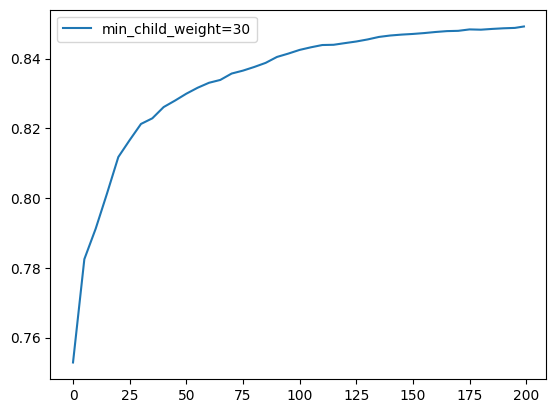

In [112]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label = min_child_weight)
    
plt.legend()

In [113]:
#razlika izmedju ovih je mala, uzećemo 1 jer je po default-u

In [114]:
#s obzirom da na ovim  graficima oko 135 iteracije se dostiže vrh, zako ćemo i podesiti naš num_boost_round, pa nam je konačan model

In [115]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,

    'seed': 1,
    'verbosity': 1
}
#ovi parametri su po default-u, kasnije ćemo da ih podešavamo

model = xgb.train(xgb_params, 
                  dtrain, 
                  num_boost_round = 135, 
                  verbose_eval = 5,
                  evals = watchlist) 

[0]	train-auc:0.76651	val-auc:0.76295
[5]	train-auc:0.80550	val-auc:0.79165
[10]	train-auc:0.81910	val-auc:0.80099
[15]	train-auc:0.83119	val-auc:0.81108
[20]	train-auc:0.83970	val-auc:0.81860
[25]	train-auc:0.84801	val-auc:0.82312
[30]	train-auc:0.85388	val-auc:0.82562
[35]	train-auc:0.85878	val-auc:0.82755
[40]	train-auc:0.86146	val-auc:0.82915
[45]	train-auc:0.86522	val-auc:0.83226
[50]	train-auc:0.86897	val-auc:0.83426
[55]	train-auc:0.87222	val-auc:0.83578
[60]	train-auc:0.87538	val-auc:0.83765
[65]	train-auc:0.87823	val-auc:0.83863
[70]	train-auc:0.88058	val-auc:0.83999
[75]	train-auc:0.88331	val-auc:0.84130
[80]	train-auc:0.88548	val-auc:0.84148
[85]	train-auc:0.88751	val-auc:0.84260
[90]	train-auc:0.88937	val-auc:0.84279
[95]	train-auc:0.89129	val-auc:0.84280
[100]	train-auc:0.89295	val-auc:0.84271
[105]	train-auc:0.89446	val-auc:0.84262
[110]	train-auc:0.89570	val-auc:0.84322
[115]	train-auc:0.89682	val-auc:0.84329
[120]	train-auc:0.89820	val-auc:0.84374
[125]	train-auc:0.8992

6.9 Selecting the best model

In [116]:
dt = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 20)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=20)

In [120]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7990426334070879

In [121]:
rf = RandomForestClassifier(n_estimators=100, 
                            max_depth = 10, 
                            min_samples_leaf= 5, 
                            random_state=11)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, random_state=11)

In [122]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8427545457916663

In [127]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,

    'seed': 1,
    'verbosity': 1
}
#ovi parametri su po default-u, kasnije ćemo da ih podešavamo

model = xgb.train(xgb_params, 
                  dtrain, 
                  num_boost_round = 135, 
                  ) 

In [128]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.844259508770195

In [ ]:
df_full_train

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
1860,ok,6,other,30,22,single,no,fixed,35,73.0,0.0,0.0,1086,1086
4154,ok,45,owner,30,64,married,no,freelance,45,157.0,20000.0,0.0,1000,1588
1754,ok,2,owner,60,30,married,yes,fixed,45,174.0,4000.0,0.0,2000,2250
1779,ok,11,rent,60,28,married,no,fixed,59,144.0,0.0,0.0,1225,1360
279,ok,2,parents,36,19,married,no,fixed,35,162.0,4000.0,100.0,400,570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,default,4,owner,60,47,married,no,freelance,75,0.0,13500.0,0.0,1900,1976
1293,ok,2,rent,60,28,single,no,fixed,45,101.0,0.0,0.0,1300,1333
4023,default,24,other,60,41,married,yes,freelance,75,0.0,0.0,0.0,2200,2428
3775,default,2,rent,48,56,single,no,freelance,51,157.0,11000.0,4500.0,1000,2008


In [131]:
df_full_train = df_full_train.reset_index(drop = True)


In [133]:
y_full_train = (df_full_train.status == 'default').astype(int).values

In [134]:
y_full_train

array([0, 0, 0, ..., 1, 1, 1])

In [135]:
del df_full_train['status']

In [146]:
dicts_full_train = df_full_train.to_dict (orient = 'records')

dv = DictVectorizer(sparse = False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict (orient = 'records')
X_test = dv.transform(dicts_test)


In [150]:
#5.01
dfulltrain = xgb.DMatrix(X_full_train, label = y_full_train, feature_names = dv.get_feature_names_out().tolist())

dtest = xgb.DMatrix(X_test, feature_names = dv.get_feature_names_out().tolist())

In [151]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 4,

    'seed': 1,
    'verbosity': 1
}

model = xgb.train(xgb_params, 
                  dtrain, 
                  num_boost_round = 135, 
                  ) 

In [154]:
y_pred = model.predict(dtest)

ValueError: feature_names mismatch: ['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore', 'home=other', 'home=owner', 'home=parents', 'home=private', 'home=rent', 'home=unknown', 'income', 'job=fixed', 'job=freelance', 'job=others', 'job=partime', 'marital=divorced', 'marital=married', 'marital=separated', 'marital=single', 'marital=unknown', 'marital=widow', 'price', 'records=no', 'records=yes', 'seniority', 'time'] ['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore', 'home=other', 'home=owner', 'home=parents', 'home=private', 'home=rent', 'home=unknown', 'income', 'job=fixed', 'job=freelance', 'job=others', 'job=partime', 'job=unknown', 'marital=divorced', 'marital=married', 'marital=separated', 'marital=single', 'marital=unknown', 'marital=widow', 'price', 'records=no', 'records=yes', 'seniority', 'time']
training data did not have the following fields: job=unknown